In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib.patches import Rectangle
%matplotlib inline   

In [2]:
data = pd.read_csv("/Users/Owner/Desktop/CSV File/ohtani_comparison.csv")

In [3]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FS,2018-04-01,88.3,-2.2281,6.2075,Shohei Ohtani,501981,660271,field_out,hit_into_play,...,54.3760,0.000,0.001,0.00,1,0,0,3,49,3
1,FS,2018-04-01,90.4,-2.3356,6.1422,Shohei Ohtani,501981,660271,null,swinging_strike,...,54.2472,0.000,0.000,null,null,null,null,null,49,2
2,FS,2018-04-01,89.9,-2.3523,6.1443,Shohei Ohtani,501981,660271,null,swinging_strike,...,54.3574,0.000,0.000,null,null,null,null,null,49,1
3,FF,2018-04-01,97.7,-2.4052,6.0475,Shohei Ohtani,621566,660271,field_out,hit_into_play,...,53.9305,0.012,0.016,0.00,1,0,0,3,48,3
4,FF,2018-04-01,98.1,-2.3942,6.0432,Shohei Ohtani,621566,660271,null,ball,...,53.5056,0.000,0.000,null,null,null,null,null,48,2


In [4]:
noah = data[data.player_name == 'Noah Syndergaard']
noah = noah.sort_index(ascending=False)
noah.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
267,SI,2018-03-29,98.7,-0.6368,6.4662,Noah Syndergaard,451594,592789,null,foul,...,54.3515,0.000,0.000,null,null,null,null,3,1,1
266,SI,2018-03-29,99.1,-0.5178,6.5450,Noah Syndergaard,451594,592789,null,foul,...,54.3698,0.000,0.000,null,null,null,null,null,1,2
265,FF,2018-03-29,99.4,-0.7655,6.5546,Noah Syndergaard,451594,592789,strikeout,swinging_strike,...,54.2472,0.000,0.000,0.00,1,0,0,null,1,3
264,SI,2018-03-29,99.0,-0.6721,6.4442,Noah Syndergaard,502054,592789,field_out,hit_into_play,...,54.3945,0.144,0.134,0.00,1,0,0,2,2,1
263,SI,2018-03-29,98.8,-0.7025,6.5553,Noah Syndergaard,572761,592789,null,ball,...,54.4648,0.000,0.000,null,null,null,null,null,3,1


In [5]:
noah = noah.loc[:, ['pitch_type', 'release_speed']]

In [6]:
noah.groupby('pitch_type').release_speed.mean()

pitch_type
CH    89.633333
CU    82.933333
FF    97.680000
SI    97.564706
SL    92.473913
Name: release_speed, dtype: float64

In [7]:
noah_SI = noah.loc[(noah['pitch_type'] == 'FF')|(noah['pitch_type'] == 'SI')]

In [8]:
noah_SI = noah_SI.reset_index(drop=True)

In [9]:
noah_SI.head()

,pitch_type,release_speed
0,SI,98.7
1,SI,99.1
2,FF,99.4
3,SI,99.0
4,SI,98.8


In [10]:
ohtani = data[data.player_name == 'Shohei Ohtani']

In [11]:
ohtani = ohtani.sort_index(ascending=False)

In [12]:
ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
91,FC,2018-04-01,96.4,-2.1588,6.1961,Shohei Ohtani,543760,660271,null,called_strike,...,54.0503,0.0,0.0,null,null,null,null,null,4,1
90,CH,2018-04-01,81.5,-2.3551,6.0276,Shohei Ohtani,543760,660271,null,swinging_strike,...,54.4206,0.0,0.0,null,null,null,null,null,4,2
89,CH,2018-04-01,83.6,-2.3563,6.0089,Shohei Ohtani,543760,660271,null,ball,...,54.4320,0.0,0.0,null,null,null,null,null,4,3
88,SL,2018-04-01,88.0,-2.1239,6.3357,Shohei Ohtani,543760,660271,strikeout,swinging_strike,...,54.4318,0.0,0.0,0.00,1,0,0,null,4,4
87,FC,2018-04-01,98.1,-2.2989,6.1684,Shohei Ohtani,476704,660271,null,swinging_strike,...,53.9771,0.0,0.0,null,null,null,null,null,5,1


In [13]:
ohtani = ohtani.loc[:, ['pitch_type', 'release_speed']]

In [14]:
ohtani.groupby('pitch_type').release_speed.mean()

pitch_type
CH    81.523529
CU    75.100000
FC    96.571429
FF    96.152632
FS    89.181818
SL    84.686667
Name: release_speed, dtype: float64

In [15]:
ohtani_FF = ohtani.loc[(ohtani['pitch_type']== 'FF')|(ohtani['pitch_type']== 'FC')]

In [16]:
ohtani_FF = ohtani_FF[ohtani_FF.release_speed > 92]

In [17]:
ohtani_FF.shape

(39, 2)

In [18]:
ohtani_FF = ohtani_FF.reset_index(drop=True)

In [19]:
sevy  = data[data.player_name == 'Luis Severino']

In [20]:
sevy = sevy.sort_index(ascending=False)
sevy = sevy.loc[:, ['pitch_type', 'release_speed']]

In [21]:
sevy.groupby('pitch_type').release_speed.mean()

pitch_type
CH    89.040000
FF    97.892857
SL    87.627273
Name: release_speed, dtype: float64

In [22]:
sevy_FF = sevy.loc[(sevy['pitch_type']== 'FF')]

In [23]:
sevy_FF = sevy_FF.reset_index(drop=True)
sevy_FF = sevy_FF[sevy_FF.release_speed > 92]

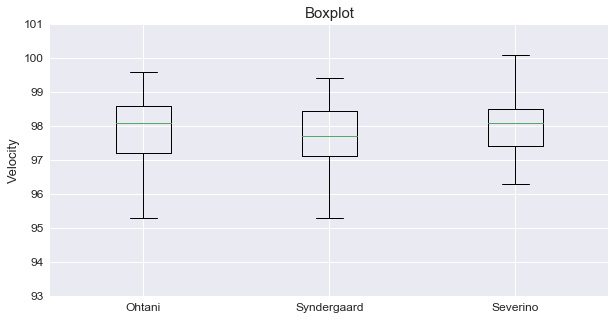

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
hige = ([ohtani_FF.release_speed], [noah_SI.release_speed], [sevy_FF.release_speed])
plt.boxplot(hige)

plt.ylim(93, 101)
ax.set_xticklabels(['Ohtani', 'Syndergaard', 'Severino'], fontsize=13)
ax.tick_params(axis='both', labelsize ='large')
plt.title("Boxplot", fontsize=15)
plt.ylabel("Velocity", fontsize=13)

plt.show()

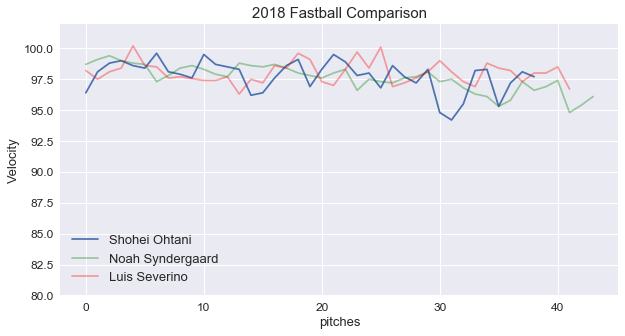

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(ohtani_FF.index, ohtani_FF.release_speed, label='Shohei Ohtani')
plt.plot(noah_SI.index, noah_SI.release_speed, c='g', label='Noah Syndergaard', alpha=0.35)
plt.plot(sevy_FF.index, sevy_FF.release_speed, c='r', label='Luis Severino', alpha=0.35)

plt.ylim(80, 102)
plt.legend(loc=3, prop={'size':13})
plt.xlabel("pitches", fontsize=13)
plt.title("2018 Fastball Comparison", fontsize=15)
plt.ylabel("Velocity", fontsize=13)
ax.tick_params(axis='both', labelsize ='large')

plt.show()

In [26]:
data = pd.read_csv("/Users/Owner/Desktop/CSV File/ohtani_debut.csv")

In [27]:
data = data.sort_index(ascending=False)
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
91,FF,2018-04-01,96.4,-2.1588,6.1961,Shohei Ohtani,543760,660271,null,called_strike,...,1,4-Seam Fastball,0,0,0,0,0,0,0,0
90,SL,2018-04-01,81.5,-2.3551,6.0276,Shohei Ohtani,543760,660271,null,swinging_strike,...,2,Slider,0,0,0,0,0,0,0,0
89,SL,2018-04-01,83.6,-2.3563,6.0089,Shohei Ohtani,543760,660271,null,ball,...,3,Slider,0,0,0,0,0,0,0,0
88,FS,2018-04-01,88.0,-2.1239,6.3357,Shohei Ohtani,543760,660271,strikeout,swinging_strike,...,4,Split Finger,0,0,0,0,0,0,0,0
87,FF,2018-04-01,98.1,-2.2989,6.1684,Shohei Ohtani,476704,660271,null,swinging_strike,...,1,4-Seam Fastball,0,0,0,0,0,0,0,0


In [28]:
data = data.reset_index(drop=True)

In [29]:
data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'pos2_person_id', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pos1_person_id',
       'pos2_person_id.1', 'pos3_person_id', 'pos4_person_id',
       'pos5_person_id', 'pos6_person_id', 'pos7_person_id', 'pos8_person_id',

In [30]:
data_2 = data.loc[:, ['pitch_type',
             'release_speed',
             'release_pos_x',
             'release_pos_y',
             'release_pos_z',
             'pfx_x',
             'pfx_z',
             'release_spin_rate',
             'release_extension']]

In [31]:
data_2.head()

,pitch_type,release_speed,release_pos_x,release_pos_y,release_pos_z,pfx_x,pfx_z,release_spin_rate,release_extension
0,FF,96.4,-2.1588,54.0503,6.1961,-0.8027,1.4634,2107,6.448
1,SL,81.5,-2.3551,54.4206,6.0276,1.2541,0.3786,2355,6.078
2,SL,83.6,-2.3563,54.4320,6.0089,1.1409,0.6527,2368,6.066
3,FS,88.0,-2.1239,54.4318,6.3357,-0.6835,0.2912,1435,6.067
4,FF,98.1,-2.2989,53.9771,6.1684,-0.7535,1.3779,2315,6.521


In [32]:
plate = data.loc[:, ['pitch_type',
                     'stand',
                     'type',
                     'plate_x',
                     'plate_z',
                     'description']]

In [33]:
plate.head()

,pitch_type,stand,type,plate_x,plate_z,description
0,FF,R,S,-0.3602,2.8144,called_strike
1,SL,R,S,0.2097,3.4337,swinging_strike
2,SL,R,B,0.2396,3.6694,ball
3,FS,R,S,0.9378,1.0950,swinging_strike
4,FF,L,S,-0.5887,3.0651,swinging_strike


for num in plate['description']:
    if(num == 'called_strike'):
        plate['description'] = plate['description'].replace({'called_strike':'strike'}, regex = True)
    elif(num == 'swinging_strike'):
        plate['description'] = plate['description'].replace({'swinging_strike':'swinging_strike'}, regex = True)
    elif(num == 'foul'):
        plate['description'] = plate['description'].replace({'foul':'foul'}, regex = True)
    elif(num == 'swinging_strike'):
        plate['description'] = plate['description'].replace({'swinging_strike':'swinging_strike'}, regex = True)
    elif(num == 'swinging_strike_blocked'):
        plate['description'] = plate['description'].replace({'swinging_strike_blocked':'swinging_strike'}, regex = True)
    elif(num == 'out_no_out'):
        plate['description'] = plate['description'].replace({'out_no_out':'hit'}, regex = True)
    elif(num == 'hit_into_play'):
        plate['description'] = plate['description'].replace({'inplay_out':'out'}, regex = True)
    elif(num == 'out_score'):
        plate['description'] = plate['description'].replace({'inplay_out_score':'homerun'}, regex = True)
    else:
        plate['description'] = plate['description'].replace({'blocked_ball':'ball'}, regex = True)

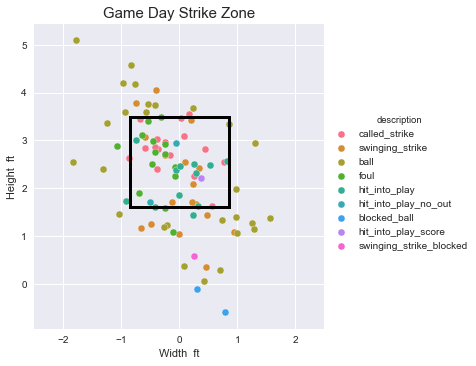

In [66]:
zone = sns.pairplot(x_vars=['plate_x'], y_vars=['plate_z'], data=plate, hue="description", size=5)
plt.title("Game Day Strike Zone", fontsize=15)
plt.ylabel("Height  ft")
plt.xlabel("Width  ft")
plt.xlim(-2.5, 2.5)
#plt.legend(prop={'size':15})

zone.axes[0, 0].add_patch(Rectangle(  fill=False, edgecolor='black', lw=3))

plt.show()
#topKzone <- 3.5
#botKzone <- 1.6
#inKzone <- -0.85
#outKzone <- 0.85

In [35]:
plate_R = plate[plate.stand == 'R']
plate_L = plate[plate.stand == 'L']

In [36]:
plate_R.head()
plate_L.head()

,pitch_type,stand,type,plate_x,plate_z,description
4,FF,L,S,-0.5887,3.0651,swinging_strike
5,FF,L,B,-0.5635,3.5901,ball
6,FF,L,B,-0.9306,3.6010,ball
7,FF,L,S,-0.3178,3.4913,foul
8,SL,L,B,-0.9703,4.2083,ball


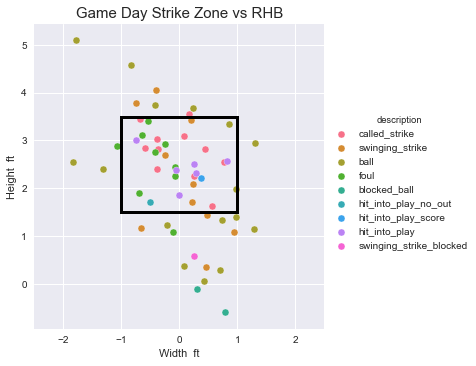

In [37]:
zone_R = sns.pairplot(x_vars=['plate_x'], y_vars=['plate_z'], data=plate_R, hue="description", size=5)
plt.title("Game Day Strike Zone vs RHB", fontsize=15)
plt.ylabel("Height  ft")
plt.xlabel("Width  ft")
plt.xlim(-2.5, 2.5)
#plt.legend(prop={'size':15})

zone_R.axes[0, 0].add_patch(Rectangle((-1.0, 1.5), 2.0, 2.0, fill=False, edgecolor='black', lw=3))

plt.show()

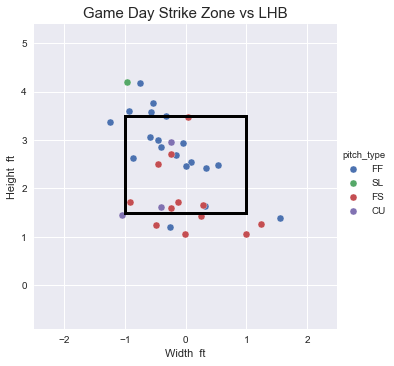

In [38]:
zone_L = sns.pairplot(x_vars=['plate_x'], y_vars=['plate_z'], data=plate_L, hue="pitch_type", size=5)
plt.title("Game Day Strike Zone vs LHB", fontsize=15)
plt.ylabel("Height  ft")
plt.xlabel("Width  ft")
plt.xlim(-2.5, 2.5)
plt.ylim(-0.9, 5.4)
#plt.legend(prop={'size':15})

zone_L.axes[0, 0].add_patch(Rectangle((-1.0, 1.5), 2.0, 2.0, fill=False, edgecolor='black', lw=3))

plt.show()